In [27]:
#mashine learning uchun malumotlarni tayyorlash
#datani numerical qilib ozgartirish kerak
import numpy as np

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder,LabelEncoder, StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
%matplotlib inline

print("libraries imported successfully.")


libraries imported successfully.


In [29]:
#makin data numerical
data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, 30, 28, 35, 28],
    'city': ['New York', 'Los Angeles', 'New York', 'Chicago', 'New York'],
    'gender': ['Female', 'Male', 'Male', 'Male', 'Female'],
    'salary': [70000, 80000, 65000, 90000, 72000],
    'purchased': ['Yes', 'No', 'Yes', 'No', 'Yes']

}
df = pd.DataFrame(data)
print("our simple dataset:")
df

our simple dataset:


,name,age,city,gender,salary,purchased
0,Alice,25,New York,Female,70000,Yes
1,Bob,30,Los Angeles,Male,80000,No
2,Charlie,28,New York,Male,65000,Yes
3,David,35,Chicago,Male,90000,No
4,Eva,28,New York,Female,72000,Yes


In [30]:
print("data types in our dataset:")
print("=" * 40)
print(df.dtypes)

print("\n" + "=" * 40)
print("\nNotice: 'object' type means text/string data ")
print("these columns need to be convertedto numbers")


data types in our dataset:
name         object
age           int64
city         object
gender       object
salary        int64
purchased    object
dtype: object


Notice: 'object' type means text/string data 
these columns need to be convertedto numbers


In [31]:
city_encoder = pd.get_dummies(df['city'], prefix='city')
print("original 'city' column:")
print(df['city'].tolist())

print("\nAfter One-Hot Encoding:")
city_encoder

original 'city' column:
['New York', 'Los Angeles', 'New York', 'Chicago', 'New York']

After One-Hot Encoding:


,city_Chicago,city_Los Angeles,city_New York
0,False,False,True
1,False,True,False
2,False,False,True
3,True,False,False
4,False,False,True


In [32]:
df_encoded = pd.get_dummies(df, columns=['city', 'gender'],prefix=['city','gender'])

print("dataset with One-Hot Encode columns:")
df_encoded

dataset with One-Hot Encode columns:


,name,age,salary,purchased,city_Chicago,city_Los Angeles,city_New York,gender_Female,gender_Male
0,Alice,25,70000,Yes,False,False,True,True,False
1,Bob,30,80000,No,False,True,False,False,True
2,Charlie,28,65000,Yes,False,False,True,False,True
3,David,35,90000,No,True,False,False,False,True
4,Eva,28,72000,Yes,False,False,True,True,False


In [33]:
df_mapped = df.copy()
df_mapped['purchased_encoded'] = df_mapped['purchased'].map({'Yes': 1, 'No': 0})
df_mapped['gender_encoded'] = df_mapped['gender'].map({'Male': 1, 'Female': 0})

print("Original vs Encoded colums:")
df_mapped[['purchased', 'purchased_encoded','gender','gender_encoded']]

Original vs Encoded colums:


,purchased,purchased_encoded,gender,gender_encoded
0,Yes,1,Female,0
1,No,0,Male,1
2,Yes,1,Male,1
3,No,0,Male,1
4,Yes,1,Female,0


In [34]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
cities = df['city'].values
cities_encoded = label_encoder.fit_transform(cities)

print("original cities:", cities)
print("encoded cities:", cities_encoded)
print("\nMapping:")
for city, code in zip(label_encoder.classes_, range(len(label_encoder.classes_))):
    print(f"{city} --> {code}")

original cities: ['New York' 'Los Angeles' 'New York' 'Chicago' 'New York']
encoded cities: [2 1 2 0 2]

Mapping:
Chicago --> 0
Los Angeles --> 1
New York --> 2


In [35]:
new_cities = ['Chicago', 'New York']
new_cities_encoded = label_encoder.transform(new_cities)
print(" encoding new data:")
print(f" {new_cities_encoded} -> {new_cities}")

decoded = label_encoder.inverse_transform([0,1,2])
print(f"\nDecoding")
print(f"[0,1,2] --> {decoded}")


 encoding new data:
 [0 2] -> ['Chicago', 'New York']

Decoding
[0,1,2] --> ['Chicago' 'Los Angeles' 'New York']


In [36]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False)
cities_2d = df[['city']]
cities_onehot = onehot_encoder.fit_transform(cities_2d)
print("original cities")
print(df['city'].tolist())
print("\nOne-Hot Encoded cities:")
print(cities_onehot)
print("\nColumns names:", onehot_encoder.get_feature_names_out(['city']))


original cities
['New York', 'Los Angeles', 'New York', 'Chicago', 'New York']

One-Hot Encoded cities:
[[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]

Columns names: ['city_Chicago' 'city_Los Angeles' 'city_New York']


In [37]:
data_missing = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 28, 35, 28],
    'city': ['New York', 'Los Angeles', np.nan, 'Chicago', 'New York'],
    'salary': [70000, 80000, np.nan, 90000, 72000],
    'score': [85, 90, 88, np.nan, 92]

}
data_missing_df = pd.DataFrame(data_missing)
print("Dataset with missing values:")
data_missing_df

Dataset with missing values:


,name,age,city,salary,score
0,Alice,25.0,New York,70000.0,85.0
1,Bob,NaN,Los Angeles,80000.0,90.0
2,Charlie,28.0,NaN,NaN,88.0
3,David,35.0,Chicago,90000.0,NaN
4,Eva,28.0,New York,72000.0,92.0


In [38]:
print("Missing values in each column:")
print("=" * 30)
print(data_missing_df.isnull().sum())

print(f"\nTotal missing values: {data_missing_df.isnull().sum().sum()}\n")
print(f"\nPercentage of missing data: {data_missing_df.isnull().sum().sum() / data_missing_df.size * 100:.1f}%")

Missing values in each column:
name      0
age       1
city      1
salary    1
score     1
dtype: int64

Total missing values: 4


Percentage of missing data: 16.0%


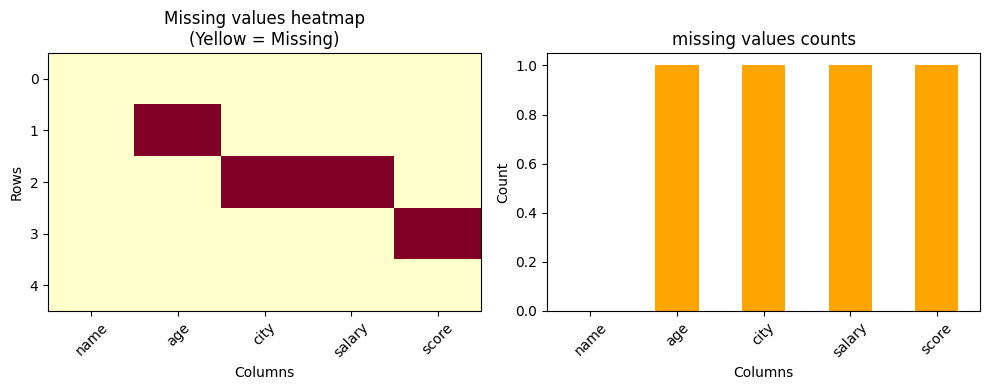

In [39]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.imshow(data_missing_df.isnull(),cmap='YlOrRd',aspect='auto')
plt.title('Missing values heatmap\n(Yellow = Missing)',fontsize=12)
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.xticks(range(len(data_missing_df.columns)),data_missing_df.columns, rotation=45)

plt.subplot(1,2,2)
data_missing_df.isnull().sum().plot(kind='bar', color='orange')
plt.title('missing values counts', fontsize=12)
plt.xlabel('Columns')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df_dropped = data_missing_df.dropna()
print("original shape:", data_missing_df.shape)
print("shape after dropping rows with missing values:", df_dropped.shape)
print("nRemaining data:")
df_dropped

original shape: (5, 5)
shape after dropping rows with missing values: (2, 5)
nRemaining data:


,name,age,city,salary,score
0,Alice,25.0,New York,70000.0,85.0
4,Eva,28.0,New York,72000.0,92.0


In [41]:
df_mean_filled = data_missing_df.copy()

age_mean = df_mean_filled['age'].mean()
df_mean_filled['age'] = df_mean_filled['age'].fillna(age_mean)

salary_mean = df_mean_filled['salary'].mean()
df_mean_filled['salary'] = df_mean_filled['salary'].fillna(salary_mean)

score_mean = df_mean_filled['score'].mean()
df_mean_filled['score'] = df_mean_filled['score'].fillna(score_mean)

print("means values used:")
print(f"Age:{age_mean:.1f}")
print(f"Salary:{salary_mean:.1f}")
print(f"Score:{score_mean:.1f}")

print("\nAfter filling with mean:")
df_mean_filled

means values used:
Age:29.0
Salary:78000.0
Score:88.8

After filling with mean:


,name,age,city,salary,score
0,Alice,25.0,New York,70000.0,85.00
1,Bob,29.0,Los Angeles,80000.0,90.00
2,Charlie,28.0,NaN,78000.0,88.00
3,David,35.0,Chicago,90000.0,88.75
4,Eva,28.0,New York,72000.0,92.00


In [42]:
df_mode_filled = data_missing_df.copy()

city_mode = df_mode_filled['city'].mode()[0]
df_mode_filled['city'] = df_mode_filled['city'].fillna(city_mode)

print(f"most common city :{city_mode}")
print("\nAfter filling missing 'city' with mode:")
df_mode_filled[['name','city']]

most common city :New York

After filling missing 'city' with mode:


,name,city
0,Alice,New York
1,Bob,Los Angeles
2,Charlie,New York
3,David,Chicago
4,Eva,New York


In [43]:
from sklearn.impute import SimpleImputer

numercal_imputer = SimpleImputer(strategy='mean')

categorical_imputer = SimpleImputer(strategy='most_frequent')

print("imputer created ")
print("\nAvailable strategies:")
print(" - 'mean' Replace  with column mean (numerical only)")
print(" = 'median'Replace  with column median (numerical only)")
print(" = 'most_frequent' Replace  with column mode (works for all types)")
print(" = 'constant' Replace  with a specifiec value")

imputer created 

Available strategies:
 - 'mean' Replace  with column mean (numerical only)
 = 'median'Replace  with column median (numerical only)
 = 'most_frequent' Replace  with column mode (works for all types)
 = 'constant' Replace  with a specifiec value


In [44]:
numerical_cols = ['age', 'salary', 'score']
numerical_data = data_missing_df[numerical_cols]

print("before imputation:")
print(numerical_data)

numerical_imputed = numercal_imputer.fit_transform(numerical_data)

print("\nAfter imputation (with mean):")
print(pd.DataFrame(numerical_imputed, columns=numerical_cols))

print("\nValues used for imputation:")
for col, value in zip(numerical_cols, numercal_imputer.statistics_):
    print(f"{col}: {value:.2f}")

before imputation:
    age   salary  score
0  25.0  70000.0   85.0
1   NaN  80000.0   90.0
2  28.0      NaN   88.0
3  35.0  90000.0    NaN
4  28.0  72000.0   92.0

After imputation (with mean):
    age   salary  score
0  25.0  70000.0  85.00
1  29.0  80000.0  90.00
2  28.0  78000.0  88.00
3  35.0  90000.0  88.75
4  28.0  72000.0  92.00

Values used for imputation:
age: 29.00
salary: 78000.00
score: 88.75


In [45]:
categorical_cols = ['city']
categorical_data = data_missing_df[categorical_cols]
print("before imputation:")
print(categorical_data)

categorical_imputed = categorical_imputer.fit_transform(categorical_data)

print("\nAfter imputation (with most frequent):")
print(pd.DataFrame(categorical_imputed, columns=categorical_cols))

print("\nValues used for imputation:")
print(f" city: {categorical_imputer.statistics_[0]}")


before imputation:
          city
0     New York
1  Los Angeles
2          NaN
3      Chicago
4     New York

After imputation (with most frequent):
          city
0     New York
1  Los Angeles
2     New York
3      Chicago
4     New York

Values used for imputation:
 city: New York


In [46]:
scala_data = pd.DataFrame({
    'age': [25, 30, 28, 35, 28],
    'salary': [70000, 80000, 65000, 90000, 72000],
    'experience_year': [85, 90, 88, 95, 92]
})

print("original data (different scales):")
print(scala_data)
print("\nNotice how 'salary' has much larger value")

original data (different scales):
   age  salary  experience_year
0   25   70000               85
1   30   80000               90
2   28   65000               88
3   35   90000               95
4   28   72000               92

Notice how 'salary' has much larger value


In [47]:
from sklearn.preprocessing import StandardScaler

standart_scaler = StandardScaler()
data_standardized = standart_scaler.fit_transform(scala_data)

df_standardized = pd.DataFrame(data_standardized, columns=scala_data.columns)
print("After standardscale:")
print(df_standardized.round(2))

print("\nMean of each column ",df_standardized.mean().round(2).tolist())
print("Standard  of each column ", df_standardized.std().round(2).tolist())

After standardscale:
    age  salary  experience_year
0 -1.27   -0.62            -1.47
1  0.24    0.53             0.00
2 -0.36   -1.19            -0.59
3  1.75    1.67             1.47
4 -0.36   -0.39             0.59

Mean of each column  [0.0, -0.0, 0.0]
Standard  of each column  [1.12, 1.12, 1.12]


In [48]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()
data_minmax = minmax_scaler.fit_transform(scala_data)

df_minmax = pd.DataFrame(data_minmax, columns=scala_data.columns)

print("after Minmaxscaler")
print(df_minmax.round(2))
print("\nMin of each column ", df_minmax.min().tolist())
print("Max of each column ", df_minmax.max().tolist())

after Minmaxscaler
   age  salary  experience_year
0  0.0    0.20              0.0
1  0.5    0.60              0.5
2  0.3    0.00              0.3
3  1.0    1.00              1.0
4  0.3    0.28              0.7

Min of each column  [0.0, 0.0, 0.0]
Max of each column  [1.0, 1.0, 1.0]


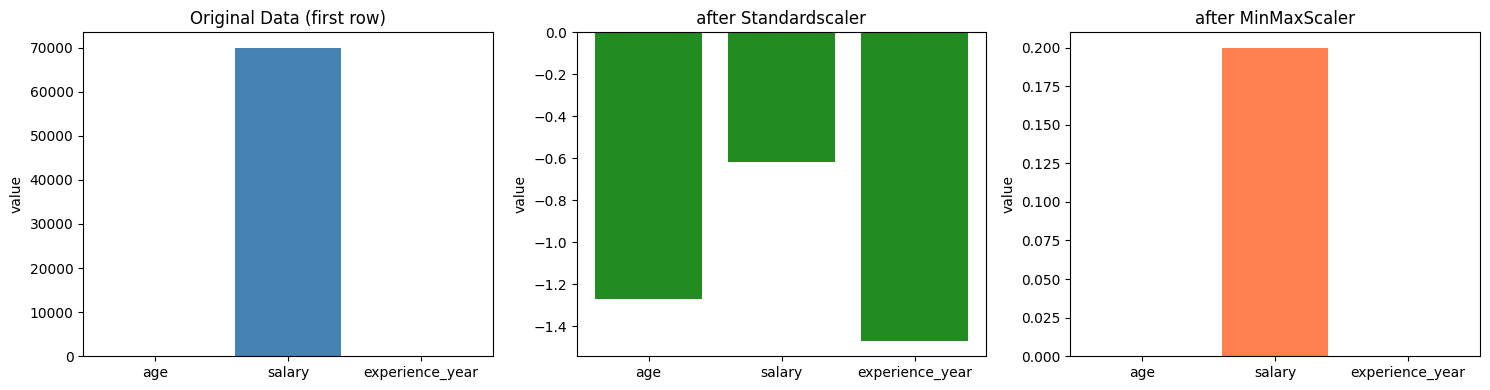

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(scala_data.columns, scala_data.iloc[0], color='steelblue')
axes[0].set_title('Original Data (first row)',fontsize = 12)
axes[0].set_ylabel('value')

axes[1].bar(df_standardized.columns, df_standardized.iloc[0], color='forestgreen')
axes[1].set_title(' after Standardscaler ', fontsize=12)
axes[1].set_ylabel('value')
axes[1].axhline(0, color='black', linestyle='--', alpha=0.5)

axes[2].bar(df_minmax.columns, df_minmax.iloc[0], color='coral')
axes[2].set_title('after MinMaxScaler', fontsize=12)
axes[2].set_ylabel('value')

plt.tight_layout()
plt.show()


In [52]:
np.random.seed(42)
n_samples = 100

realistic_data = pd.DataFrame({
    'age' : np.random.randint(18, 70,n_samples).astype(float),
    'income' : np.random.randint(5000, 15000, n_samples).astype(float),
    'education':np.random.choice(['High School', 'Bachelors', 'Masters', 'PhD'], n_samples),
    'employed' :np.random.choice(['Yes', 'No'], n_samples),
    'credit_score': np.random.randint(300, 850, n_samples).astype(float),
    'approved' :np.random.choice([0,1], n_samples)
})

missing_indices = np.random.choice(n_samples, 15, replace=False)
realistic_data.loc[missing_indices[:5], 'age'] = np.nan
realistic_data.loc[missing_indices[5:10], 'income'] = np.nan
realistic_data.loc[missing_indices[10:], 'credit_score'] = None

print("realistic dataset with missing values")
print(realistic_data.head(10))
print(f"\nMissing values: {realistic_data.isnull().sum().sum()}")


realistic dataset with missing values
    age   income    education employed  credit_score  approved
0  56.0   5064.0      Masters      Yes         460.0         0
1   NaN  13006.0    Bachelors      Yes         555.0         1
2  46.0   7568.0    Bachelors       No         622.0         0
3  32.0  10463.0  High School       No         427.0         0
4  60.0   7027.0          PhD       No         317.0         0
5  25.0   7695.0    Bachelors       No         622.0         1
6  38.0  14687.0          PhD       No         587.0         1
7  56.0  10258.0    Bachelors       No         454.0         0
8  36.0  10618.0          PhD      Yes         789.0         1
9  40.0  11736.0      Masters       No         685.0         0

Missing values: 15


In [54]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = realistic_data.drop('approved', axis=1)
y = realistic_data['approved']

numerical_features = ['age', 'income', 'credit_score']
categorical_features = ['education', 'employed']

print("Feature types:")
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Feature types:
Numerical features: ['age', 'income', 'credit_score']
Categorical features: ['education', 'employed']


In [55]:
numerical_pipline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
print("individual pipelines created.")
print("numerical pipeline steps:")
print(" 1. Impute missing values with median")
print(" 2. standadize value (mean=0, std=1)")
print("\nCategorical pipeline steps:")
print(" 1. Impute missing values with most frequent")
print(" 2. One-hot encode the categories")

individual pipelines created.
numerical pipeline steps:
 1. Impute missing values with median
 2. standadize value (mean=0, std=1)

Categorical pipeline steps:
 1. Impute missing values with most frequent
 2. One-hot encode the categories


In [56]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipline, numerical_features),
        ('cat', categorical_pipeline, categorical_features)
    ]
)
print("ColumnTransformer created.")
print("\nThis applies:")
print("  - numerical_pipeline to numerical features")
print("  - categorical_pipeline to: educated, employed")

ColumnTransformer created.

This applies:
  - numerical_pipeline to numerical features
  - categorical_pipeline to: educated, employed


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 80 samples
Test set size: 20 samples


In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Before preprocessing:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("\nAfter preprocessing")
print(f"X_train shape: {X_train_processed.shape}")
print(f"X_test shape: {X_test_processed.shape}")
print("\nNotice more columns because of one-hot encoding")


Before preprocessing:
X_train shape: (80, 5)
X_test shape: (20, 5)

After preprocessing
X_train shape: (80, 9)
X_test shape: (20, 9)

Notice more columns because of one-hot encoding


In [59]:
numerical_names = numerical_features
categorical_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features).tolist()
all_feature_names = numerical_names + categorical_names

print("All feature names after preprocessing:")
for i, name in enumerate(all_feature_names):
    print(f"{i}: {name}")

print("\nFirst 5 rows of preprocessed training data:")
pd.DataFrame(X_train_processed[:5], columns=all_feature_names).round(2)

All feature names after preprocessing:
0: age
1: income
2: credit_score
3: education_Bachelors
4: education_High School
5: education_Masters
6: education_PhD
7: employed_No
8: employed_Yes

First 5 rows of preprocessed training data:


,age,income,credit_score,education_Bachelors,education_High School,education_Masters,education_PhD,employed_No,employed_Yes
0,-0.39,0.58,-1.40,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.32,-0.55,1.12,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.94,-0.45,-0.84,0.0,0.0,0.0,1.0,0.0,1.0
3,1.74,0.17,-0.49,0.0,0.0,1.0,0.0,1.0,0.0
4,-1.62,0.17,0.09,0.0,0.0,0.0,1.0,1.0,0.0
